<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/%E3%80%8CPerceptron%26GradientDescent%26FromScratch_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris.data.shape)
iris.data

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


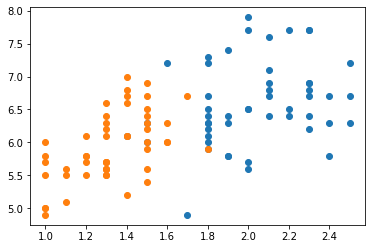

In [9]:
df_0 = df[df['species'] == 2] # setosa
df_1 = df[df['species'] == 1] # versicolour
plt.scatter(df_0.petal_width, df_0.sepal_length)
plt.scatter(df_1.petal_width, df_1.sepal_length)

### 練習時間

### 畫圖
1. setosa, virginica 的 petal_length, sepal_length散佈圖
2. setosa, virginica 的 petal_length, petal_width 散佈圖
3. 三種花的 petal_length, petal_width 散佈圖

In [10]:
# 練習
# setosa:0, versicolour:1, virginica:2 

## Perceptron 感知器

In [11]:
import numpy as np

class Perceptron():
    """
    learning_rate(學習率) : float (0.0 ~ 1.0)
    n_iter (迭代數) : int
    """
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.w_ = np.random.rand(1 + X.shape[1]) # 權重 [w0, w1, w2...]
        
    def predict(self, X):
        # 預測輸入值 (1, -1)
        net_input = np.dot(X, self.w_[1:]) + self.w_[0]
        return np.where(net_input >= 0.0, 1, -1)
    
    def fit(self, X, y):
        """        
        用訓練集資料X訓練預測y
        X : shape = [資料筆數, 特徵數]
        y : shape = [資料筆數]
        """
        self.errors_ = [] # 分類錯誤數紀錄

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                if update != 0.0:
                    errors += 1
#                 errors += int(update != 0.0)
            self.errors_.append(errors)

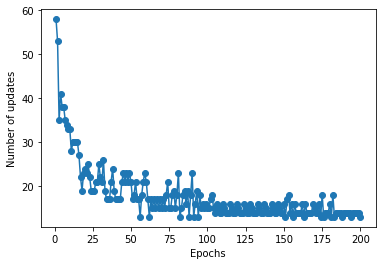

In [12]:
# prepare data
df_data = df[(df.species == 2) | (df.species == 1)].sample(frac=1)
X = df_data[['petal_width', 'sepal_length']].values
y = np.where(df_data.species.values == 1, -1, 1)

# train model
ppn = Perceptron(learning_rate=0.01, n_iter=200)
ppn.fit(X, y)

# draw error logs
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, 
                    edgecolor='black',
                    label=cl)

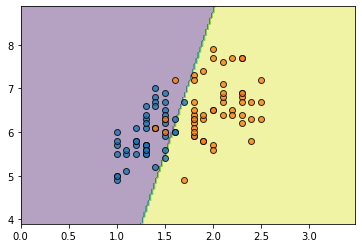

In [14]:
plot_decision_regions(X, y, classifier=ppn)

### 練習時間
觀察不同的訓練資料與參數訓練的模型結果如何
1. 使用不同的品種訓練(species = 0, 1, 2)
2. 使用不同的特徵
3. 調整learning_rate (每次調整10的倍數)

### 練習時間: Activation function
試著將step function, sigmoid, relu 畫在同一張圖 (<-5x<5)

ValueError: ignored

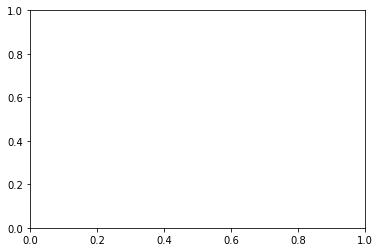

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    # type here
    return
def sigmoid(x):
    # type here
    return
def relu(x):
    # type here
    return

x = np.arange(-5, 5, 0.1)
plt.plot(x,step_function(x))
plt.plot(x,sigmoid(x))
plt.plot(x,relu(x))
plt.show()

## Gradient Descent 梯度下降
### 微分公式：$ \frac{df(x)}{dx} =\lim\limits_{h\to 0} \frac{(f(x+h) - f(x-h))}{2h} $
### 梯度下降 : $ x = {x} - \eta\frac{df}{dx} $
### 函數1 : $ {f(x)} = {x^2} + 2x + 1 $

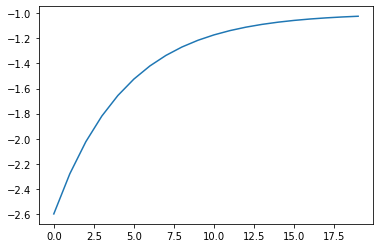

-1.0230584300920915


In [17]:
import matplotlib.pyplot as plt
def f(x):
    return x**2 + 2*x + 1

def derivative(x):
    h = 1e-4
    f_h1 = f(x+h)
    f_h2 = f(x-h)
    return (f_h1 - f_h2) / (2*h)

log = []
x = -3
learning_rate = 0.1
for i in range(20):
    gradient = derivative(x)
    x -= (learning_rate * gradient)
    log.append(x)
plt.plot(range(len(log)),log)
plt.show()
print(x)

## 手刻神經網路

In [18]:
import numpy as np
import matplotlib.pyplot as plt
class FCNN:

    def __init__(self, input_size, hidden_size, output_size):
        # weight initialization: 權重初始化
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        def softmax(x):
            if x.ndim == 2:
                x = x.T
                x = x - np.max(x, axis=0)
                y = np.exp(x) / np.sum(np.exp(x), axis=0)
                return y.T 
            x = x - np.max(x)
            return np.exp(x) / np.sum(np.exp(x))
        
        
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x: input, t: target
    def loss(self, x, t):
        def cross_entropy_error(y, t):
            if y.ndim == 1:
                t = t.reshape(1, t.size)
                y = y.reshape(1, y.size)
            if t.size == y.size:
                t = t.argmax(axis=1)
            batch_size = y.shape[0]
            return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
        
        return cross_entropy_error(self.predict(x), t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x: input, t: target
    def compute_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = self.numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = self.numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = self.numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = self.numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    def numerical_gradient(self, f, x):
        h = 1e-4
        grad = np.zeros_like(x)

        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)

            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)

            x[idx] = tmp_val
            it.iternext()   

        return grad

In [19]:
nn = FCNN(input_size=4, hidden_size=2, output_size=3)

In [20]:
for key in nn.params:
    print(key, nn.params[key].shape)

W1 (4, 2)
b1 (2,)
W2 (2, 3)
b2 (3,)


In [21]:
from sklearn.datasets import load_iris

def one_hot_encoding(x):
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder()
    enc.fit(x)
    return enc.transform(x).toarray()
iris = load_iris()
x = iris.data
y = iris.target.reshape(-1,1)
y = one_hot_encoding(y)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [23]:
train_loss = []
train_acc = []
val_acc = []

iterations = 10000
learning_rate = 0.01
train_size = x_train.shape[0]
batch_size = 8
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iterations):
    # 取樣 batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 計算梯度
    grad = nn.compute_gradient(x_batch, y_batch)
    
    # 更新權重
    for key in ('W1', 'b1', 'W2', 'b2'):
        nn.params[key] -= learning_rate * grad[key]
        
    # 記錄訓練loss
    loss = nn.loss(x_batch, y_batch)
    train_loss.append(loss)
    
    # 每個iteration 紀錄訓練與驗證準確率
    if i % iter_per_epoch == 0:
        train_acc.append(nn.accuracy(x_train, y_train))
        val_acc.append(nn.accuracy(x_val, y_val))
        print(f'iter: {i} train acc: {train_acc[-1]}, val_acc: {val_acc[-1]} \n')

iter: 0 train acc: 0.3142857142857143, val_acc: 0.3333333333333333 

iter: 105 train acc: 0.3142857142857143, val_acc: 0.3333333333333333 

iter: 210 train acc: 0.3142857142857143, val_acc: 0.3111111111111111 

iter: 315 train acc: 0.6095238095238096, val_acc: 0.5777777777777777 

iter: 420 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 525 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 630 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 735 train acc: 0.6571428571428571, val_acc: 0.6666666666666666 

iter: 840 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 945 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 1050 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter: 1155 train acc: 0.638095238095238, val_acc: 0.6444444444444445 

iter: 1260 train acc: 0.5047619047619047, val_acc: 0.4888888888888889 

iter: 1365 train acc: 0.6761904761904762, val_acc: 0.6444444444444445 

iter:

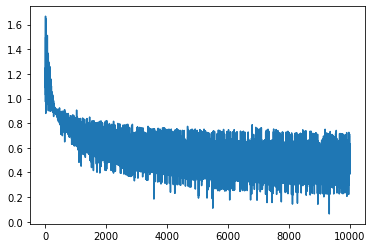

In [24]:
plt.plot(train_loss)

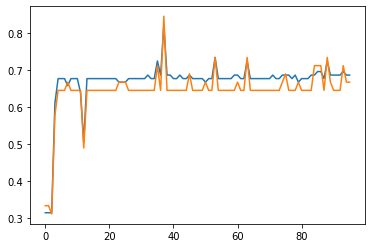

In [25]:
plt.plot(train_acc)
plt.plot(val_acc)

## 練習
1. 試著將 FCNN改成2, 3層 hidden layers的神經網路
2. 使用 sklearn.datasets 的 load digits 資料集配上今天所學，訓練一個手寫數字辨識的神經網路

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

7
[ 0.  0.  6. 16. 13. 12. 14.  1.  0.  0. 14.  4.  4. 15.  4.  0.  0.  1.
  7.  0. 10.  7.  0.  0.  0.  0.  0.  2. 13.  1.  0.  0.  0.  2.  9. 14.
 16. 12.  0.  0.  0.  4.  6. 15.  2.  4.  1.  0.  0.  0.  6.  7.  0.  0.
  0.  0.  0.  0. 10.  4.  0.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

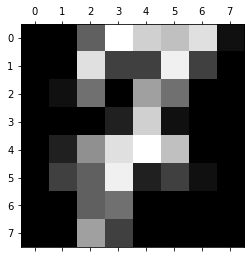

In [27]:
index = np.random.randint(0,len(digits.data))
print(digits.target[index])
print(digits.data[index])
plt.gray()
plt.matshow(digits.images[index])
plt.show()